<a href="https://colab.research.google.com/github/baycat/elec301/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELEC 301 Homework 2

In [ ]:
import scipy.io as sc
from scipy import signal
import numpy as np
import matplotlib
import matplotlib.image as im
import matplotlib.pyplot as plt
import time
import struct
from sklearn.metrics.pairwise import  cosine_similarity

**Question 2**


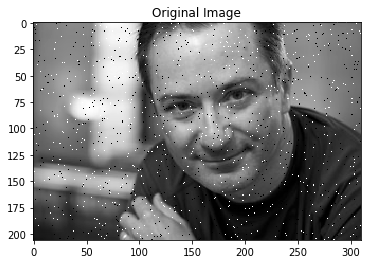

In [ ]:
noisy_richb = sc.loadmat('noisy_richb.mat')
image = noisy_richb['x']
n1,n2 = np.shape(image)
plt.imshow(image, interpolation='nearest', cmap='gray')
plt.title('Original Image')
plt.show()


In [ ]:
r = 3
k = int(np.floor(r/2))


In [ ]:
#Start timer
start_time = time.time()
#Initialize matrix to hold filtered image
image_median = np.zeros((n1,n2))
#Loop over pixels (exluding border around perimeter to avoid edge cases),
#computing the median of the neighborhood around each pixel to form the filtered image

#YOUR CODE HERE
#for i in range(?):
#    for j in range(?):
#        image_batch = image[?]
#        image_median[i,j] = np.median(image_batch)
        
print("Run time for median filter is %s seconds" % (time.time() - start_time))       
plt.imshow(image_median, interpolation='nearest', cmap='gray')
plt.title(f'Median Filtered Image (k={k})')
plt.show()



In [ ]:
#Start Timer
start_time = time.time()
#Initialize Matrix
image_mean = np.zeros((n1,n2))
#implement via separable convolution algorithm from problem 1

#YOUR CODE HERE
#h1 = ?
#h2 = ?
#for i in range(?):
#    image_mean[?] = np.covolve(h1,?)
#for j in range(?):
#    ? = np.convolve(h2,?)

print("Run time for mean filter is %s seconds" % (time.time() - start_time))               
plt.imshow(image_mean, interpolation='nearest', cmap='gray')
plt.title(f'Mean Filtered Image (k={k})')
plt.show()


**Question 3**


In [ ]:
a = sc.loadmat('cauchy_schwarz_decoding.mat')
b = sc.loadmat('cauchy_schwarz_decoding_2.mat')


In [ ]:
chrp = b['chrp']
_,L_chrp = np.shape(chrp) 
y2 = np.squeeze(b['y2'])
#Find the sequence of inner products between chirp and received signal via convolution:

#YOUR CODE HERE
#conv = signal.convolve(?)


In [ ]:
#Find peaks in conv to locate chirp start/stop tones and extract the desired signal

#YOUR CODE HERE
#y = y2[?]


In [ ]:
#Use your code from homework 1 to decode the bits from the noisy signal

#YOUR CODE HERE
#result = ?

In [ ]:
#binary conversion 
strResult = ''.join(str(n[0]) for n in result)
byteResult = list(int(strResult[i : i+8][::-1], 2) for i in range(0, len(strResult), 8))
arrayResult = np.asarray([byteResult]).astype('uint8')
#writing the bits as an image
f = open('result.jpg','wb')
f.write(arrayResult)
f.close()